In [1]:
frame <- read.csv( "DataSet-Autos.csv" )

In [2]:
print( tail( frame ) )

              model  mpg cyl    wt
15       Camaro Z28 13.3   8 3.840
16 Pontiac Firebird 19.2   8 3.845
17     Lotus Europa 30.4   4 1.513
18     Ford Pantera 15.8   8 3.170
19     Ferrari Dino 19.7   6 2.770
20    Maserati Bora 15.0   8 3.570


In [3]:
library( ggplot2 )

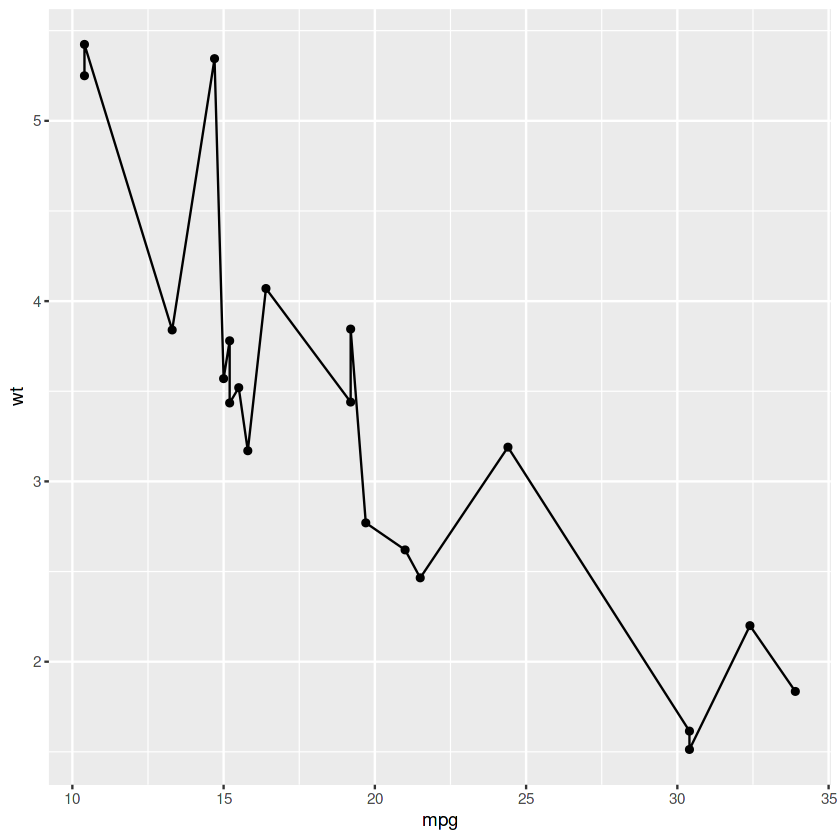

In [4]:
qplot( mpg, wt, data=frame, geom=c( "point", "line" ) )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



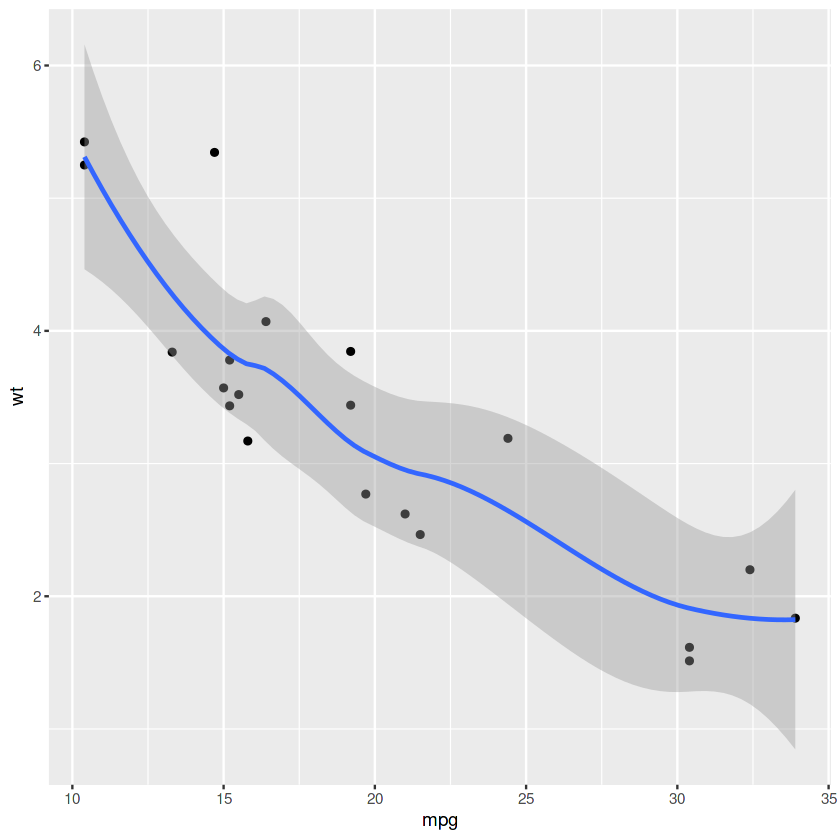

In [5]:
qplot( mpg, wt, data=frame, geom=c( "point", "smooth" ) )

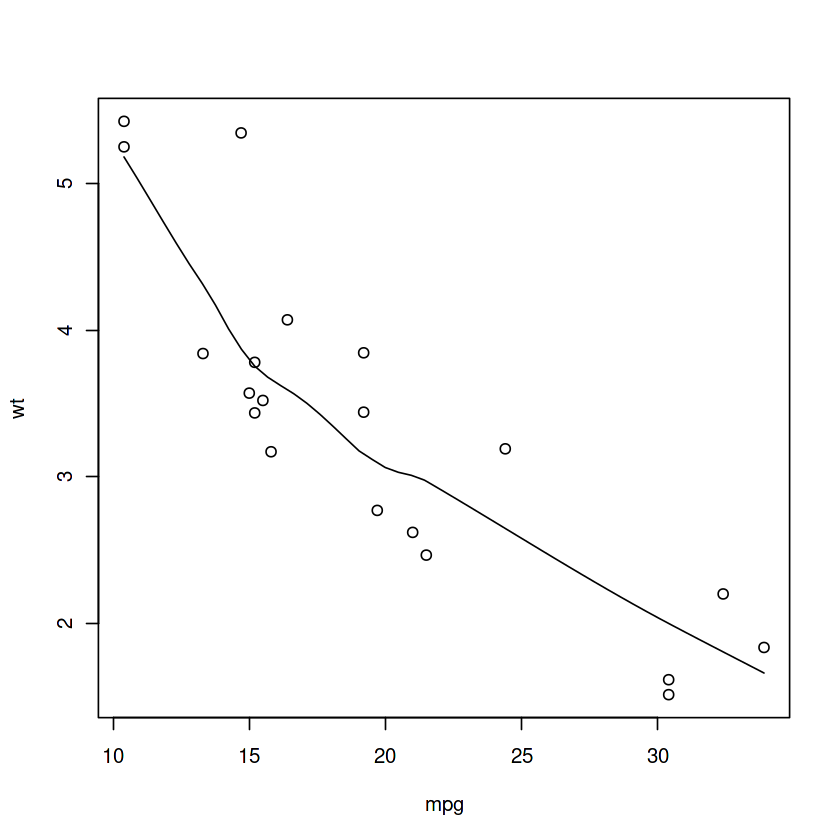

In [20]:
with(frame, scatter.smooth(mpg, wt, span=.7))

In [21]:
?with

with {base},R Documentation
data,"data to use for constructing an environment. For the default with method this may be an environment, a list, a data frame, or an integer as in sys.call. For within, it can be a list or a data frame."
expr,"expression to evaluate; particularly for within() often a “compound” expression, i.e., of the form { a <- somefun() b <- otherfun() ..... rm(unused1, temp) }"
keepAttrs,"for the list method of within(), a logical specifying if the resulting list should keep the attributes from data and have its names in the same order. Often this is unneeded as the result is a named list anyway, and then keepAttrs = FALSE is more efficient."
...,arguments to be passed to (future) methods.
